In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [168]:
data = pd.read_csv("drug200.csv")

In [169]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [170]:
data.shape

(200, 6)

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [172]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [173]:
data.duplicated().sum()

np.int64(0)

In [174]:
data.select_dtypes('object').value_counts()

Sex  BP      Cholesterol  Drug 
F    HIGH    NORMAL       drugY    14
     NORMAL  HIGH         drugX    12
M    NORMAL  HIGH         drugY    11
     LOW     NORMAL       drugX    10
                          drugY     9
     HIGH    NORMAL       drugY     9
     NORMAL  NORMAL       drugX     9
     LOW     HIGH         drugC     9
F    HIGH    HIGH         drugY     9
M    LOW     HIGH         drugY     8
     HIGH    NORMAL       drugA     8
F    LOW     NORMAL       drugX     8
M    NORMAL  HIGH         drugX     8
F    NORMAL  NORMAL       drugX     7
     LOW     HIGH         drugC     7
                          drugY     7
             NORMAL       drugY     6
     HIGH    HIGH         drugA     6
M    HIGH    HIGH         drugA     6
F    NORMAL  HIGH         drugY     6
M    HIGH    HIGH         drugB     6
                          drugY     6
F    NORMAL  NORMAL       drugY     5
     HIGH    NORMAL       drugB     4
M    HIGH    NORMAL       drugB     4
F    HIGH    NORMA

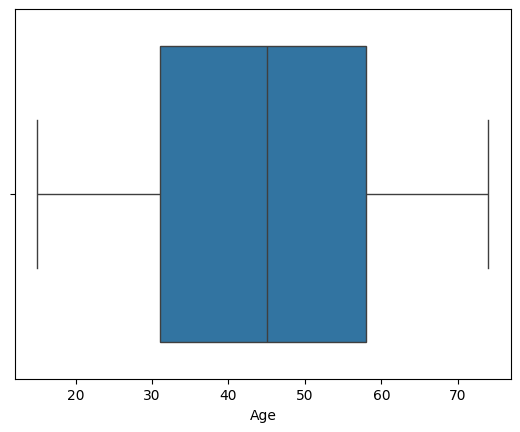

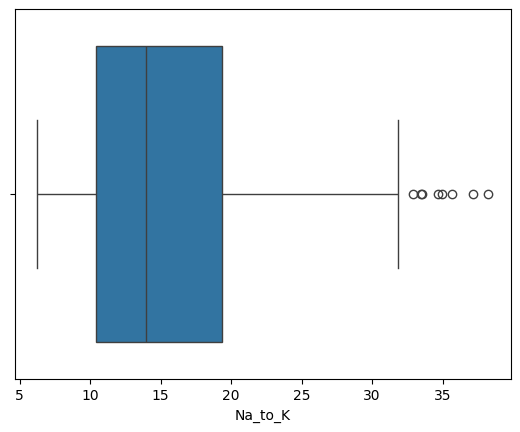

In [175]:
cat_col = data.select_dtypes('number').columns
for i in cat_col:
    sns.boxplot(data,x=i)
    plt.show()

In [176]:
data.Na_to_K = data.Na_to_K.clip(lower=data.Na_to_K.quantile(0.05),upper=data.Na_to_K.quantile(0.95))

<Axes: xlabel='Na_to_K'>

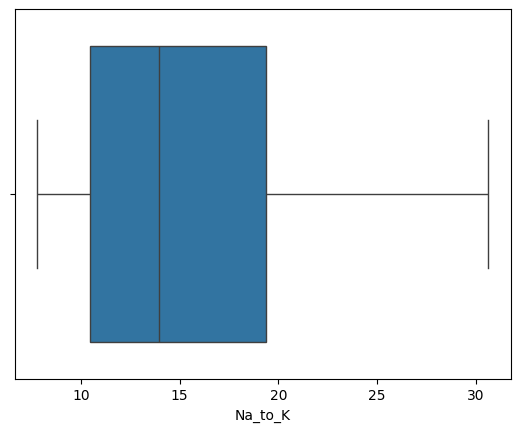

In [177]:
sns.boxplot(data,x=data.Na_to_K)

In [199]:
x = data.iloc[:,:-1]
x = x.drop(columns=['Sex'])
y = data.iloc[:,-1]

In [200]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

cat_col = []
for i in x.select_dtypes('object').columns:
    cat_col.append(i)
print(cat_col)
encoded_x = ohe.fit_transform(x[cat_col])
encoded_x

['BP', 'Cholesterol']


array([[1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0.

In [201]:
x_encoder = pd.DataFrame(encoded_x, columns=ohe.get_feature_names_out())
# x_encoder.index = x.index
x_encoder

,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...
195,0.0,1.0,0.0,1.0,0.0
196,0.0,1.0,0.0,1.0,0.0
197,0.0,0.0,1.0,1.0,0.0
198,0.0,0.0,1.0,0.0,1.0


In [202]:
concat_x = pd.concat([x,x_encoder],axis=1)
concat_x

,Age,BP,Cholesterol,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,HIGH,HIGH,25.355,1.0,0.0,0.0,1.0,0.0
1,47,LOW,HIGH,13.093,0.0,1.0,0.0,1.0,0.0
2,47,LOW,HIGH,10.114,0.0,1.0,0.0,1.0,0.0
3,28,NORMAL,HIGH,7.798,0.0,0.0,1.0,1.0,0.0
4,61,LOW,HIGH,18.043,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,56,LOW,HIGH,11.567,0.0,1.0,0.0,1.0,0.0
196,16,LOW,HIGH,12.006,0.0,1.0,0.0,1.0,0.0
197,52,NORMAL,HIGH,9.894,0.0,0.0,1.0,1.0,0.0
198,23,NORMAL,NORMAL,14.020,0.0,0.0,1.0,0.0,1.0


In [203]:
concat_x.columns

Index(['Age', 'BP', 'Cholesterol', 'Na_to_K', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL',
       'Cholesterol_HIGH', 'Cholesterol_NORMAL'],
      dtype='object')

In [204]:
concat_x = concat_x[['Age', 'Na_to_K', 'BP_HIGH', 'BP_LOW', 'Cholesterol_HIGH']]
concat_x

,Age,Na_to_K,BP_HIGH,BP_LOW,Cholesterol_HIGH
0,23,25.355,1.0,0.0,1.0
1,47,13.093,0.0,1.0,1.0
2,47,10.114,0.0,1.0,1.0
3,28,7.798,0.0,0.0,1.0
4,61,18.043,0.0,1.0,1.0
...,...,...,...,...,...
195,56,11.567,0.0,1.0,1.0
196,16,12.006,0.0,1.0,1.0
197,52,9.894,0.0,0.0,1.0
198,23,14.020,0.0,0.0,0.0


In [205]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [206]:
count = 0
max_acc = 0.0
cm = 0
count_j = 0

# for i in range(101):
x_train,x_test,y_train,y_test = train_test_split(concat_x,y,test_size=0.20,random_state=98)
    # for j in range(50):

        
dc = DecisionTreeClassifier(random_state=0)
dc.fit(x_train,y_train)

y_pred = dc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test,y_pred,average='weighted')
acc = accuracy_score(y_test,y_pred)
print(cm)
print(dc.score(x_test,y_test))
print(f"F1 Score is: {f1:.2f}")
print(f"Acuuracy score is: {acc}")
        # acc = dc.score(x_test,y_test)

    #     if acc > max_acc:
    #         max_acc = acc
    #         count = i
    #         count_j = j
    #         cm = cm
    # print(f'Count is: {count},count of j: {count_j} accuracy is: {max_acc}, confusion matrix: {cm}')

[[ 0  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 14  1]
 [ 0  0  0  0 18]]
0.95
F1 Score is: 0.96
Acuuracy score is: 0.95


In [207]:
import pickle
model = r"C:\Users\sevug\Desktop\New folder\bigdatahandson\drugs_prediction\Testing\decision_tree_classifier.pkl"
encoder = r'C:\Users\sevug\Desktop\New folder\bigdatahandson\drugs_prediction\Testing\onehotencoder.pkl'
pickle.dump(dc, open(model,'wb'))
pickle.dump(ohe,open(encoder,'wb'))

In [187]:
x_train_rfe, x_test_rfe, y_train_rfe, y_test_rfe = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [192]:
from sklearn.feature_selection import RFE

f1_score_list = []

for i in range(1, 10):
    rfe_selector = RFE(estimator=dc, n_features_to_select=i, step=1)
    rfe_selector.fit(x_train_rfe,y_train_rfe)

    sel_x_train_rfe = rfe_selector.transform(x_train_rfe)
    sel_x_test_rfe = rfe_selector.transform(x_test_rfe)

    dc.fit(sel_x_train_rfe,y_train_rfe)
    rfe_preds = dc.predict(sel_x_test_rfe)

    f1_score_rfe = round(f1_score(y_test_rfe, rfe_preds,average='weighted'), 3)
    f1_score_list.append(f1_score_rfe)

In [193]:
f1_score_list

[np.float64(0.598),
 np.float64(0.716),
 np.float64(0.773),
 np.float64(0.858),
 np.float64(0.96),
 np.float64(0.96),
 np.float64(0.96),
 np.float64(0.96),
 np.float64(0.96)]

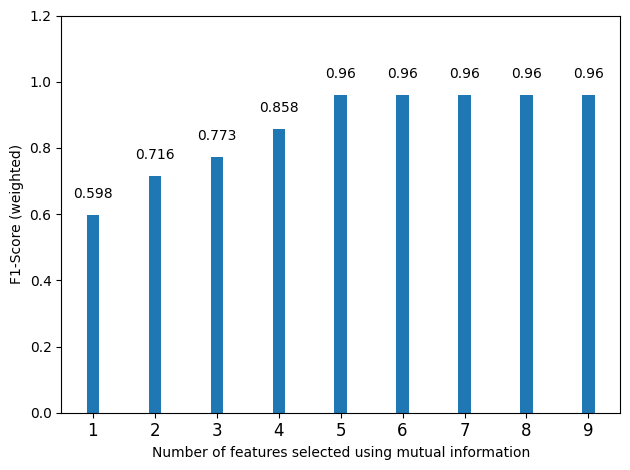

In [194]:
import numpy as np
fig, ax = plt.subplots()

x_value = np.arange(1,10)
y_value = f1_score_list

ax.bar(x_value,y_value,width=0.2)
ax.set_xlabel("Number of features selected using mutual information")
ax.set_ylabel("F1-Score (weighted)")
ax.set_ylim(0, 1.2)
ax.set_xticks(x_value)
ax.set_xticklabels(x_value, fontsize=12)

for i, v in enumerate(y_value):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')

plt.tight_layout()

In [195]:
rfe_selector = RFE(estimator=dc, n_features_to_select=5, step=1)
rfe_selector.fit(x_train_rfe,y_train_rfe)

selected_features_mask = rfe_selector.get_support()
selected_features = x_train_rfe.columns[selected_features_mask]
selected_features

Index(['Age', 'Na_to_K', 'BP_HIGH', 'BP_LOW', 'Cholesterol_HIGH'], dtype='object')